In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# سحرخیز‌ترین و شب‌زنده‌دارترین شهر‌ها بر اساس اطلاعات خرید مشتریان کدام شهرها هستند؟ میزان سحرخیزی یا شب‌زنده‌داری با مقدار خرید رابطه‌ای دارد؟

In [3]:
df3 = pd.read_csv('3.csv')

In [4]:
df3.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [5]:
df3['date'], df3['time'] = zip(*df3['DateTime_CartFinalize'].map(lambda x: x.split(' ')))

In [6]:
df3['year'], df3['month'], df3['day'] = zip(*df3['date'].map(lambda x: x.split('-')))

In [7]:
df3.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,date,time,year,month,day
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15,08:50:56.000,2015,10,15
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11,00:29:26.000,2018,02,11
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14,00:30:08.000,2016,06,14
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03,14:37:19.000,2018,09,03
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21,11:51:02.000,2016,05,21


اگر سحرخیزها رو کسایی بگیریم که بین ساعت ۳ تا ۶ خرید می‌کنن...

In [8]:
saharkhiz = df3[(df3['time']>='03:00:00.000') & (df3['time']<='06:00:00.000')]

In [9]:
saharkhiz.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,date,time,year,month,day
11,5623610,2827566,23927,2016-12-04 03:12:59.000,108000.0,لالی,1.0,2016-12-04,03:12:59.000,2016,12,04
20,6156363,3549803,193926,2017-01-24 03:05:35.000,41284.0,تهران,3.0,2017-01-24,03:05:35.000,2017,01,24
23,9194454,1468632,67518,2017-10-28 03:52:34.000,71560.0,قم,1.0,2017-10-28,03:52:34.000,2017,10,28
24,22454972,3527897,882178,2018-09-11 04:53:56.000,47706.0,تهران,1.0,2018-09-11,04:53:56.000,2018,09,11
92,12082993,834004,438498,2018-03-28 03:15:17.000,122936.0,تهران,1.0,2018-03-28,03:15:17.000,2018,03,28


In [12]:
cities = saharkhiz['city_name_fa'].unique()
dict1 = {}
for i in range(len(cities)):
    dict1[cities[i]] = len(saharkhiz[saharkhiz['city_name_fa'] == cities[i]])

In [14]:
import operator
sorted_cities_sahar = sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_cities_sahar)

[('تهران', 2299), ('اهواز', 176), ('مشهد', 163), ('اصفهان', 154), ('کرج', 134), ('شیراز', 120), ('قم', 81), ('رشت', 75), ('تبریز', 60), ('کرمانشاه', 57), ('یزد', 49), ('کرمان', 41), ('بابل', 36), ('گرگان', 36), ('بندر عباس', 36), ('ساری', 33), ('لاهیجان', 30), ('همدان', 28), ('بندر ماهشهر', 27), ('قزوین', 26), ('ارومیه', 24), ('اردبیل', 24), ('زاهدان', 23), ('شاهین شهر', 22), ('بندر انزلی', 22), ('آمل', 19), ('قائم شهر', 19), ('اراک', 18), ('زنجان', 16), ('بابلسر', 16), ('خرم آباد', 16), ('سمنان', 15), ('آبادان', 14), ('چالوس', 13), ('نیشابور', 13), ('فردیس', 13), ('بوشهر', 13), ('نوشهر', 13), ('اسلامشهر', 13), ('سنندج', 12), ('کاشان', 12), ('یاسوج', 12), ('بیرجند', 12), ('شهرکرد', 12), ('شهریار', 11), ('بروجرد', 11), ('کیش', 11), ('بهبهان', 11), ('دزفول', 11), ('نجف آباد', 10), ('سیرجان', 10), ('اندیشه', 10), ('گنبدکاووس', 9), ('مسجد سلیمان', 8), ('رفسنجان', 8), ('ایلام', 8), ('بهشهر', 8), ('ساوه', 7), ('شاهرود', 7), ('اندیمشک', 7), ('محمود آباد', 7), ('صومعه سرا', 6), ('رامهرمز', 6),

حالا اگر شب‌زنده‌دارها بین ساعت ۱۲ تا ۳ خرید کنن

In [15]:
shabfelan = df3[(df3['time']>='00:00:00.000') & (df3['time']<='03:00:00.000')]

In [16]:
shabfelan.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,date,time,year,month,day
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11,00:29:26.000,2018,02,11
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14,00:30:08.000,2016,06,14
21,11140715,6500201,574889,2018-02-13 02:15:42.000,380000.0,اهواز,1.0,2018-02-13,02:15:42.000,2018,02,13
22,9503051,3048383,449799,2017-11-18 01:05:08.000,20000.0,اصفهان,1.0,2017-11-18,01:05:08.000,2017,11,18
32,23241056,535856,1399641,2018-10-13 00:18:22.000,55000.0,ساری,1.0,2018-10-13,00:18:22.000,2018,10,13


In [17]:
cities2 = shabfelan['city_name_fa'].unique()
dict2 = {}
for i in range(len(cities)):
    dict2[cities2[i]] = len(shabfelan[shabfelan['city_name_fa'] == cities2[i]])

In [19]:
sorted_cities_shab = sorted(dict2.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_cities_shab)

[('تهران', 12758), ('مشهد', 911), ('اصفهان', 903), ('کرج', 819), ('اهواز', 815), ('شیراز', 650), ('رشت', 499), ('تبریز', 435), ('قم', 391), ('کرمانشاه', 389), ('یزد', 311), ('ساری', 263), ('کرمان', 250), ('بندر عباس', 212), ('همدان', 187), ('قزوین', 183), ('گرگان', 180), ('ارومیه', 179), ('اراک', 175), ('آمل', 168), ('بابل', 160), ('خرم آباد', 153), ('اردبیل', 129), ('زنجان', 128), ('فردیس', 125), ('لاهیجان', 125), ('قائم شهر', 116), ('کاشان', 115), ('زاهدان', 114), ('دزفول', 109), ('بندر انزلی', 98), ('بندر ماهشهر', 97), ('گنبدکاووس', 87), ('بوشهر', 83), ('شاهین شهر', 83), ('آبادان', 74), ('تنکابن', 73), ('سنندج', 73), ('بجنورد', 68), ('بیرجند', 65), ('نوشهر', 61), ('شهرکرد', 58), ('بابلسر', 58), ('اسلامشهر', 57), ('سمنان', 54), ('چالوس', 53), ('ایلام', 52), ('بروجرد', 52), ('نیشابور', 51), ('شاهرود', 47), ('نجف آباد', 47), ('ملایر', 46), ('لنگرود', 46), ('شهریار', 45), ('رامسر', 44), ('یاسوج', 43), ('بهشهر', 42), ('اندیشه', 39), ('بهبهان', 37), ('سیرجان', 37), ('جهرم', 36), ('زابل', 

اگر میان‌گین مقدار خرید شب‌زنده‌دار‌ها و سحرخیزها و بقیه‌ی ساعت‌های روز رو مقایسه کنیم:

In [20]:
other = df3[(df3['time']>='06:00:00.000') & (df3['time']<='23:59:59.000')]

In [21]:
other.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,date,time,year,month,day
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15,08:50:56.000,2015,10,15
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03,14:37:19.000,2018,09,03
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21,11:51:02.000,2016,05,21
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0,2018-03-01,12:07:15.000,2018,03,01
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0,2017-08-19,13:30:24.000,2017,08,19


In [29]:
sahar = saharkhiz['Amount_Gross_Order'].mean()
shab = shabfelan['Amount_Gross_Order'].mean()
mean = other['Amount_Gross_Order'].mean()
dict3 = {'early birds': sahar,
        'night owls': shab,
        'birds?': mean}

In [30]:
dict3

{'early birds': 919719.2701088116,
 'night owls': 1140724.7147171781,
 'birds?': 1523715.9092905386}

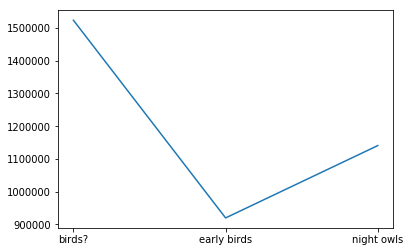

In [31]:
lists = sorted(dict3.items())
x, y = zip(*lists) 
plt.plot(x, y)
plt.show()

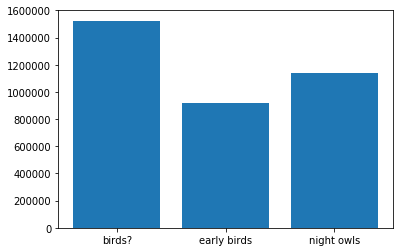

In [32]:
plt.bar(x, y)
plt.show()